<font size = 8 color ='336EFF'>kMedoids</font>

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
%matplotlib inline

kMedoid function

In [2]:
class KMedoidsClass:
    def __init__(self, data, k, iters):
        self.data= data
        self.k = k
        self.iters = iters
        samples, _ = self.data.shape
        self.colors =  np.array(np.random.randint(0, 255, size = (self.k, 4)))/255
        self.colors[:, 3] = 1
        # Start Medoids
        ## start the medoids randomly
        idx = np.random.permutation(samples)
        self.medoids = np.array([data[i] for i in idx[:self.k]])
        # ## start the same medoids to check repeatability
        # self.medoids = np.array([data[i] for i in range(self.k)])

    def manhattan(self, p1, p2):
        return np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))

    def get_costs(self, medoids, data):
        tmp_clusters = {i:[] for i in range(len(medoids))}
        cst = 0
        # loop through all the data
        for d in data:
            # calculate the distance of point and medoids
            dst = np.array([self.manhattan(d, md) for md in medoids])
            # assign cost with the minimum value and get what medoid it belongs
            cst += dst.min()
            c = dst.argmin()
            # assign data to medoid
            tmp_clusters[c].append(d)

        tmp_clusters = {k:np.array(v) for k, v in tmp_clusters.items()} # convert value to np.array
        return tmp_clusters, cst
    def plot_clusters(self, count):
        plt.gcf()
        plt.title(f"Step : {count}")
        for t in range(self.k):
            plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = self.colors[t])
        plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=self.colors)
        plt.show()

    def fit(self):
        self.clusters, cost = self.get_costs(data=self.data, medoids=self.medoids)
        count = 0
        self.plot_clusters(count)
        while True:
            count+=1
            swap = False
            # check if any of the samples can replace any of the medoids
            for j in range(self.k):
                for d in self.data:
                    if not d in self.medoids:
                        tmp_meds = self.medoids.copy()
                        tmp_meds[j] = d
                        clusters_, cost_ = self.get_costs(data=self.data, medoids=tmp_meds)

                        # if the swap reduce the cost, then keep the swap
                        if cost_ < cost:
                            self.medoids = tmp_meds
                            cost = cost_
                            swap = True
                            self.clusters = clusters_
                            print(f"Medoids Changed to: {self.medoids}.")
                            self.plot_clusters(count)
            if count > self.iters:
                print("End of the iterations.")
                break
            if not swap:
                print("No changes.")
                break

In [3]:
dt = np.random.randint(0, 100, (100,2))

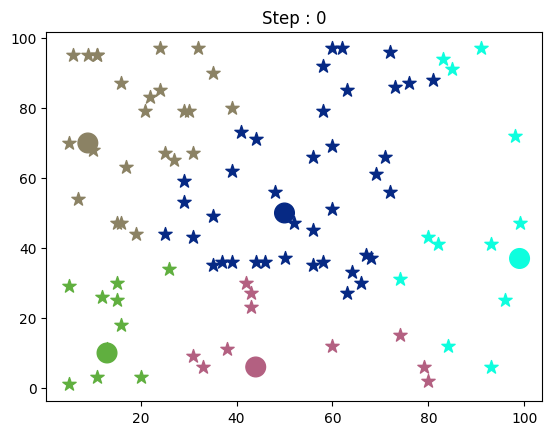

Medoids Changed to: [[24 97]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


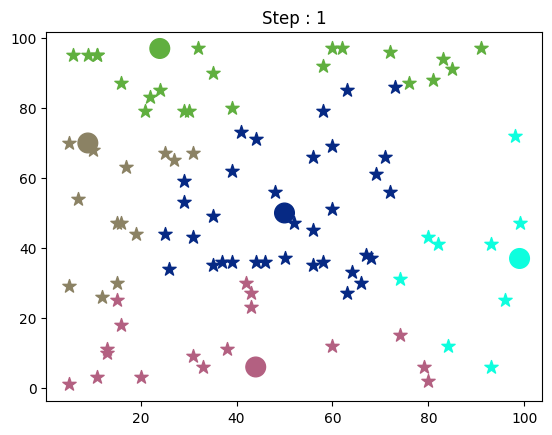

Medoids Changed to: [[71 66]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


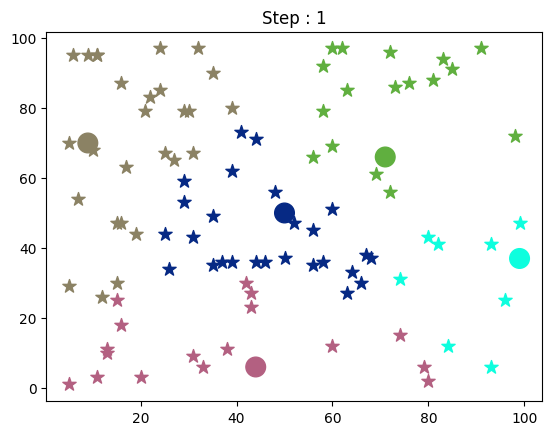

Medoids Changed to: [[83 94]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


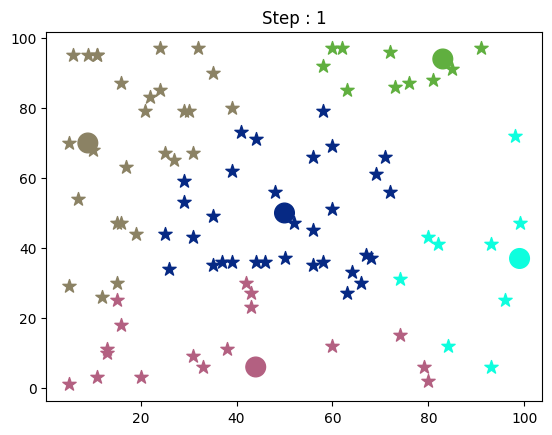

Medoids Changed to: [[73 86]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


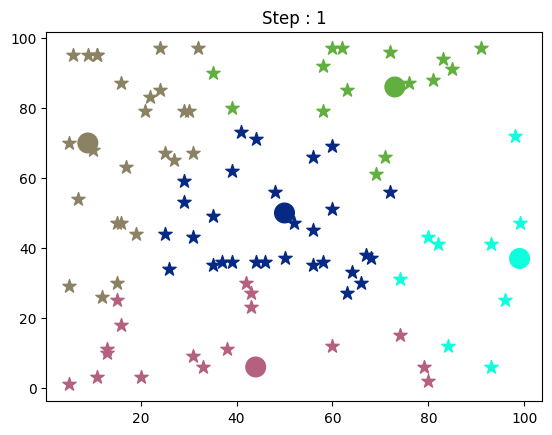

Medoids Changed to: [[72 96]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


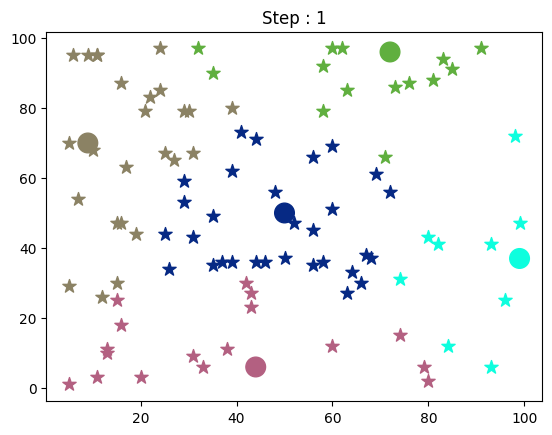

Medoids Changed to: [[63 85]
 [50 50]
 [99 37]
 [ 9 70]
 [44  6]].


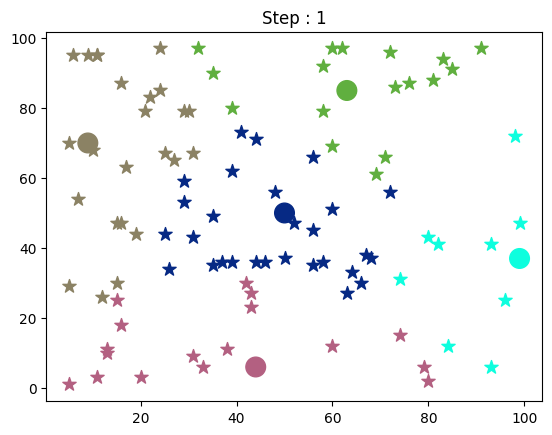

Medoids Changed to: [[63 85]
 [46 36]
 [99 37]
 [ 9 70]
 [44  6]].


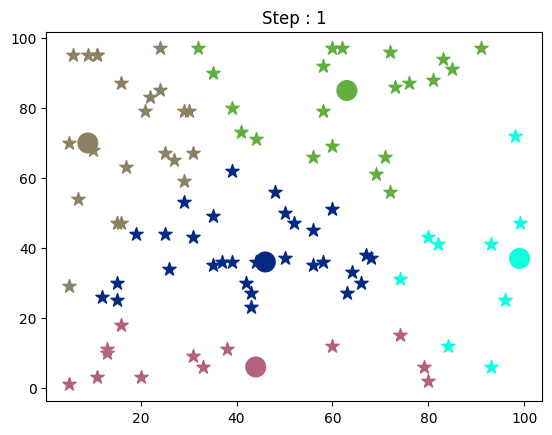

Medoids Changed to: [[63 85]
 [46 36]
 [74 31]
 [ 9 70]
 [44  6]].


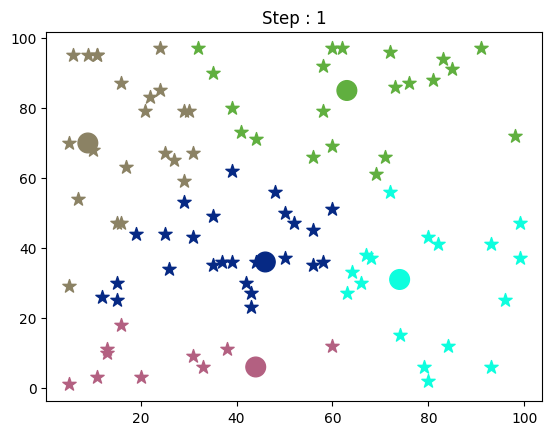

Medoids Changed to: [[63 85]
 [46 36]
 [74 31]
 [30 79]
 [44  6]].


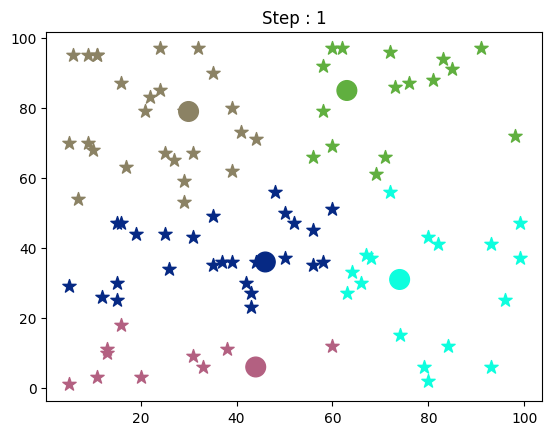

Medoids Changed to: [[63 85]
 [46 36]
 [74 31]
 [25 67]
 [44  6]].


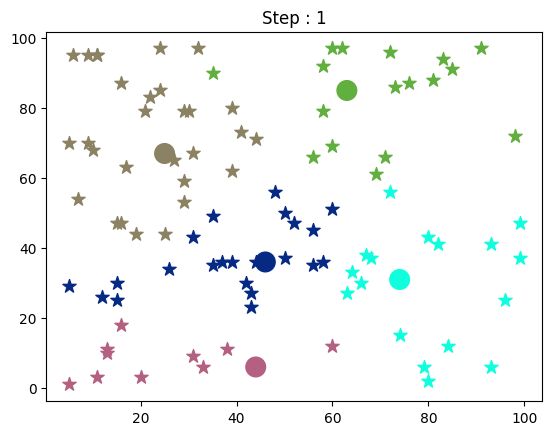

Medoids Changed to: [[63 85]
 [46 36]
 [74 31]
 [25 67]
 [16 18]].


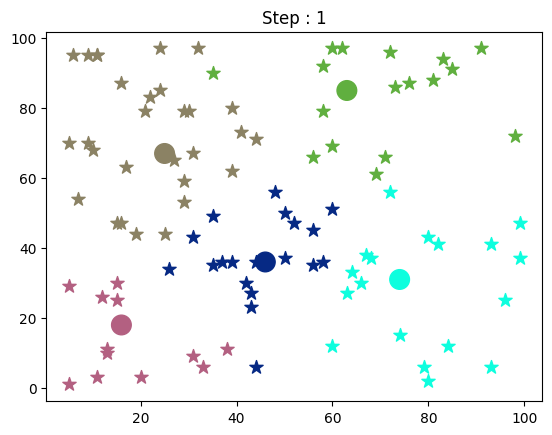

Medoids Changed to: [[63 85]
 [46 36]
 [74 31]
 [25 67]
 [13 11]].


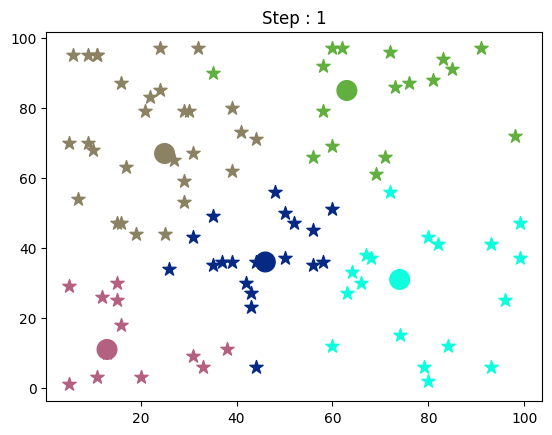

Medoids Changed to: [[73 86]
 [46 36]
 [74 31]
 [25 67]
 [13 11]].


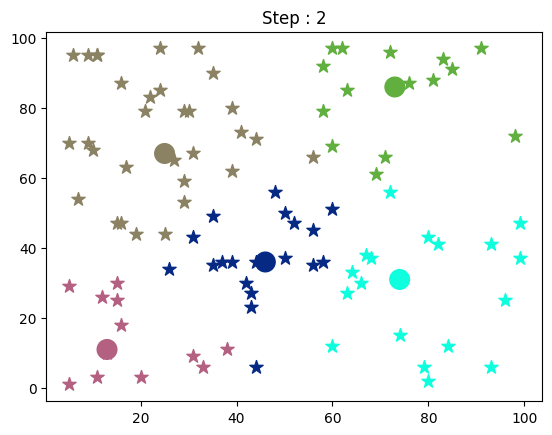

Medoids Changed to: [[73 86]
 [46 36]
 [74 31]
 [21 79]
 [13 11]].


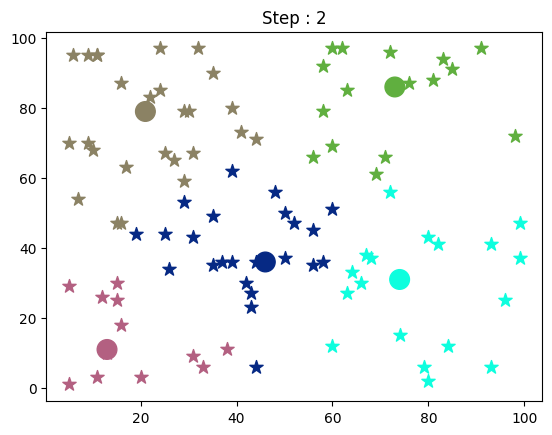

No changes.


In [4]:
# Create a figure with a single subplot
fig, ax = plt.subplots()

kmedoids = KMedoidsClass(dt, 5, 5)
kmedoids.fit()